# Etude de l'importance de gamma

Dans cette partie, on étudie l'importance du paramêtre gamma pour la résolution du problème highway.

On fait varier le paramêtres gamma et on observe des agent pré-entrainé sur stable_baselines3 sur le problème highway.

## Résultats

On observe que pour la résolution du problème highway, le paramètre gamma n'a pas un impact très important sur la performance de l'agent. En effet, on observe que les agents pré-entrainé sur stable_baselines3 ont des performances similaires pour des valeurs de gamma différentes

Cependant, il est important de noter que le paramètre gamma a certainement un impact sur la vitesse de convergence et d'apprentissage de l'agent, information à laquelle nous n'avons pas accès dans cette étude.

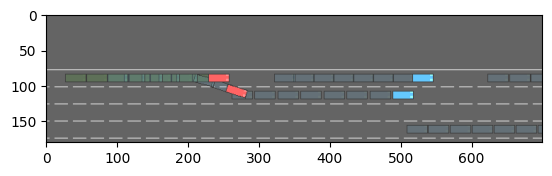

In [2]:
import gymnasium
import highway_env
from stable_baselines3 import DQN
import torch
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output


from config.config_sb import config_dict



gammas = [ i * 0.1 - 0.01 for i in range(1, 10)]
models = [DQN.load(f"highway_dqn/model_gamma_{gamma:.2f}") for gamma in gammas]

envs = [gymnasium.make("highway-fast-v0", render_mode="rgb_array") for _ in range(10)]
for env_instance in envs:
    env_instance.unwrapped.configure(config_dict)
    env_instance.reset(seed=42)  # Ensuring the same initial conditions by setting a fixed seed

for model, env in zip(models, envs):
    done = truncated = False
    obs, info = env.reset()
    episode_reward = 0
    
    while not (done or truncated):
        action, _states = model.predict(obs, deterministic=True)
        obs, reward, done, truncated, info = env.step(action)
        episode_reward += reward
        env.render()
        clear_output(wait=True)
        plt.imshow(env.render())
        plt.show()
